In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
import pandas as pd
df = pd.read_csv('stock.csv',usecols=[5])               #index_col=None,)
df

,Close
0,2440.399
1,2440.900
2,2441.399
3,2441.770
4,2441.899
5,2442.400
6,2442.390
7,2442.389
8,2442.640
9,2442.390


In [3]:
df[df['Close'].astype(str).str.isdigit()]

,Close


In [4]:
df.set_index('Close', inplace=True)

In [5]:

df.to_csv('newstock1.csv',header=None,)

In [6]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('./newstock1.csv', 50, True)

In [7]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.13120102882385254


In [8]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3212 samples, validate on 170 samples
Epoch 1/1
3212/3212 [==============================] - 18s - loss: 3.8809e-04 - val_loss: 1.6649e-06


yo


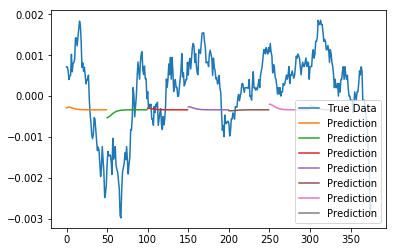

In [9]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)